<a href="https://colab.research.google.com/github/karri-ten/Jamb-2024-Performance-dataset/blob/main/jamb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''import the csv file from local computer as df
the CSV files
'''
df = pd.read_csv(r"/content/jamb_exam_results.csv")

In [3]:
'''Return the data inside the CSV file, showing the rows and columns'''
df

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,Public,Urban,Yes,No,Low,Low,4996,16,Male,Medium,Primary,2
4996,179,0,80,2,20.0,Public,Rural,No,Yes,Medium,Medium,4997,22,Male,Low,Secondary,1
4997,261,17,89,3,11.3,Public,Urban,No,No,Low,High,4998,18,Male,Medium,Primary,3
4998,183,15,96,2,15.9,Public,Rural,No,No,Low,Medium,4999,18,Male,Medium,Secondary,1


In [4]:
df.describe()
'''Generate descriptive statistic'''

'Generate descriptive statistic'

In [5]:
df.info()
'''prints information about the dataframe including the index dtype and columns, non-null values and memory usage.'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

'prints information about the dataframe including the index dtype and columns, non-null values and memory usage.'

In [6]:
'''
Return dimensionality of the data, the number of columns and rows
'''
df.shape

(5000, 17)

## Data cleaning

In [7]:
''' Count number of distinct elements in specified axis.
Return Series with number of distinct elements. Can ignore NaN values.'''
df.nunique()

,0
JAMB_Score,220
Study_Hours_Per_Week,41
Attendance_Rate,51
Teacher_Quality,5
Distance_To_School,201
School_Type,2
School_Location,2
Extra_Tutorials,2
Access_To_Learning_Materials,2
Parent_Involvement,3


In [8]:
# check for duplicate
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [9]:
# return only the column header with numerical data using while loop

numerical = [f for f in df.columns if df[f].dtype!='O']
numerical

['JAMB_Score',
 'Study_Hours_Per_Week',
 'Attendance_Rate',
 'Teacher_Quality',
 'Distance_To_School',
 'Student_ID',
 'Age',
 'Assignments_Completed']

In [10]:
# return only the column header with numerical data using select_dtypes

numerical_columns = df.select_dtypes(include="number").columns
print(numerical_columns)

Index(['JAMB_Score', 'Study_Hours_Per_Week', 'Attendance_Rate',
       'Teacher_Quality', 'Distance_To_School', 'Student_ID', 'Age',
       'Assignments_Completed'],
      dtype='object')


In [11]:
# return only the column header with object data using select_dtypes

object_columns = df.select_dtypes(include="object").columns
print(object_columns)

Index(['School_Type', 'School_Location', 'Extra_Tutorials',
       'Access_To_Learning_Materials', 'Parent_Involvement', 'IT_Knowledge',
       'Gender', 'Socioeconomic_Status', 'Parent_Education_Level'],
      dtype='object')


## Exploratory Data Analysis

Univariate Anaalysis

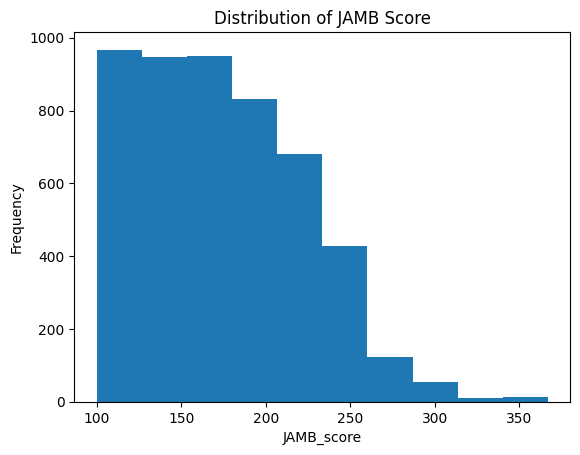

In [12]:
plt.hist(df["JAMB_Score"])
plt.xlabel('JAMB_score')
plt.ylabel("Frequency")
plt.title("Distribution of JAMB Score")
plt.show()

<ipython-input-13-f2ce27c3db94>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Attendance_Rate"],)


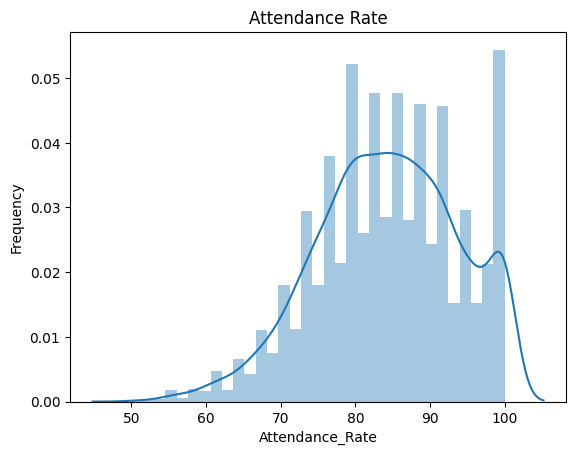

In [13]:
# d
sns.distplot(df["Attendance_Rate"],)
plt.xlabel("Attendance_Rate")
plt.ylabel("Frequency")
plt.title("Attendance Rate")
plt.show()

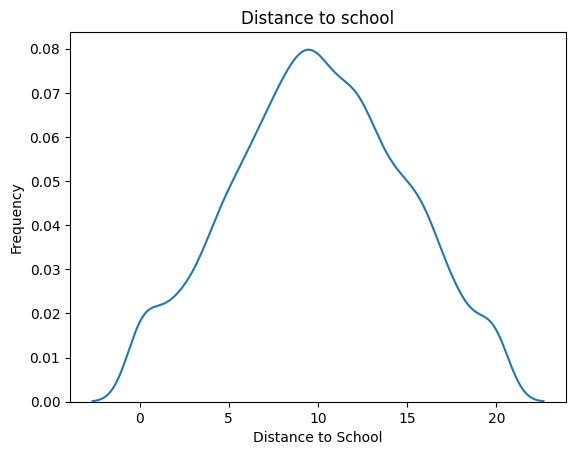

In [14]:
sns.kdeplot(df["Distance_To_School"])
plt.xlabel("Distance to School")
plt.ylabel("Frequency")
plt.title("Distance to school")
plt.show()

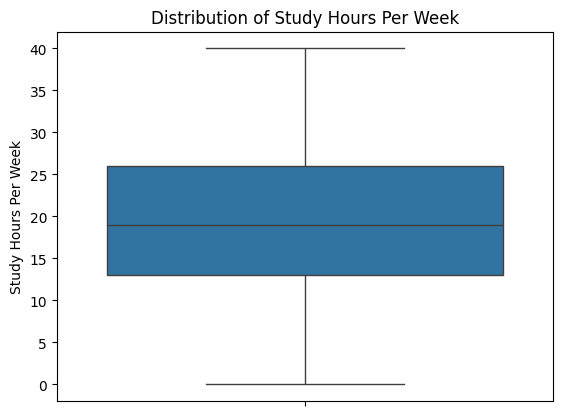

In [15]:
sns.boxplot(y='Study_Hours_Per_Week', data=df)
plt.title('Distribution of Study Hours Per Week')
plt.ylabel('Study Hours Per Week')
plt.show()

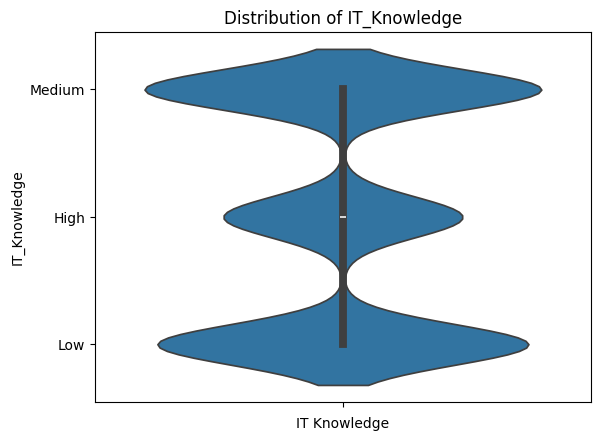

In [16]:
sns.violinplot(y='IT_Knowledge', data=df)
plt.title('Distribution of IT_Knowledge')
plt.xlabel('IT Knowledge')
plt.show()

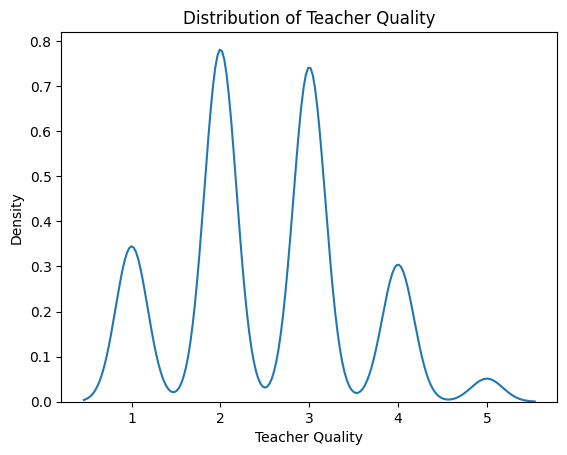

In [17]:
sns.kdeplot(data=df, x="Teacher_Quality")
plt.title('Distribution of Teacher Quality')
plt.xlabel('Teacher Quality')
plt.show()

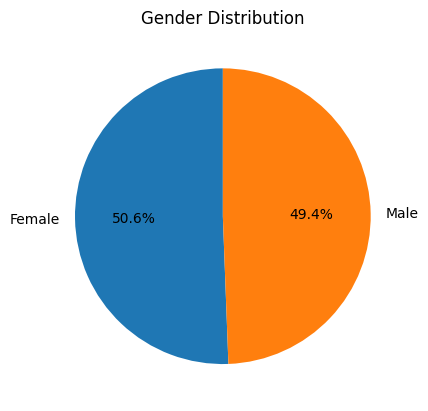

In [18]:
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%', startangle=90 )
plt.title('Gender Distribution')
plt.show()

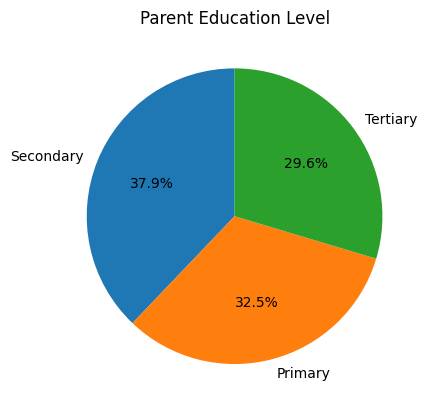

In [19]:
plt.pie(df['Parent_Education_Level'].value_counts(), labels=df['Parent_Education_Level'].value_counts().index, autopct='%1.1f%%', startangle=90 )
plt.title('Parent Education Level')
plt.show()

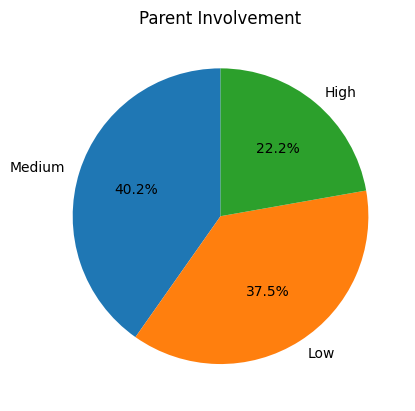

In [20]:
plt.pie(df["Parent_Involvement"].value_counts(), labels=df["Parent_Involvement"].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Parent Involvement')
plt.show()

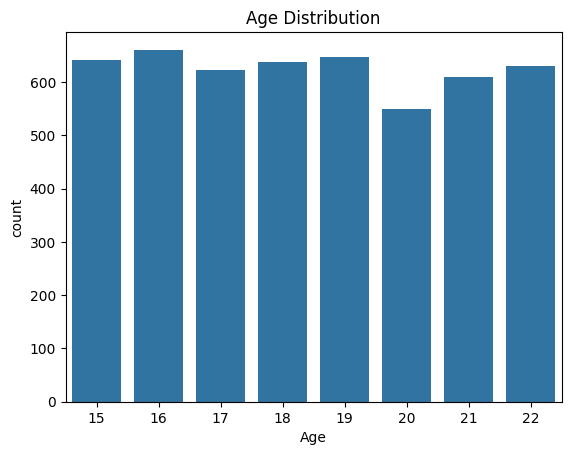

In [21]:
sns.countplot(x='Age', data=df)
plt.title('Age Distribution')
plt.show()

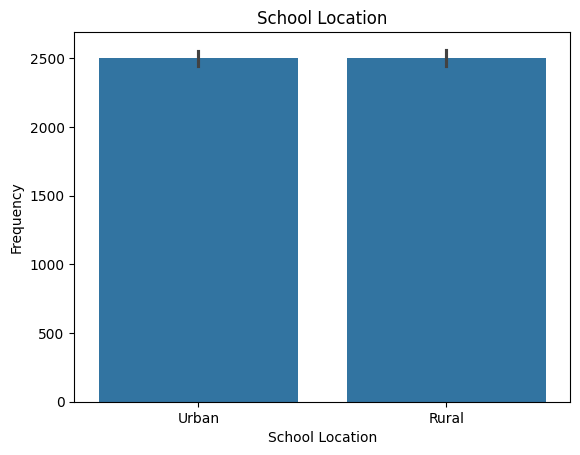

In [22]:
sns.barplot(data =df, x = "School_Location", y= df['School_Location'].index)
plt.xlabel('School Location')
plt.ylabel('Frequency')
plt.title('School Location')
plt.show()

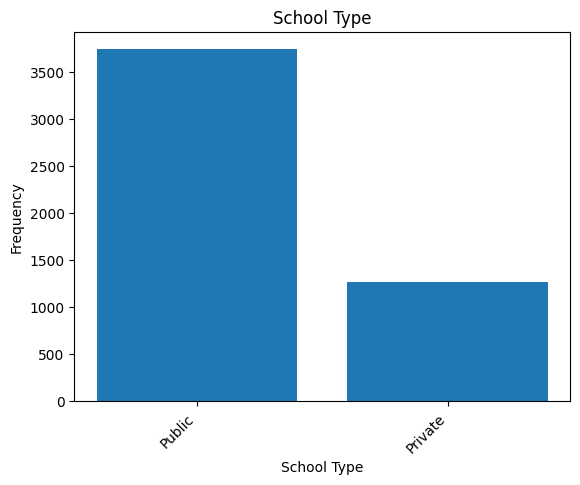

In [23]:
plt.bar(df['School_Type'].value_counts().index, df['School_Type'].value_counts())
plt.xlabel('School Type')
plt.ylabel('Frequency')
plt.title('School Type')
plt.xticks(rotation=45, ha='right')
plt.show()

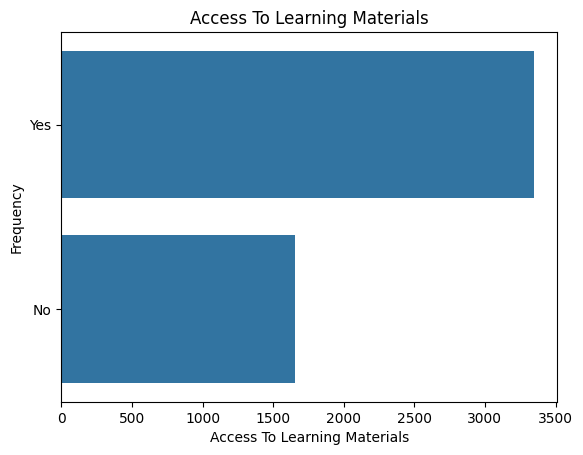

In [24]:
sns.countplot(y=df["Access_To_Learning_Materials"], data=df)
plt.title("Access To Learning Materials")
plt.xlabel("Access To Learning Materials")
plt.ylabel("Frequency")
plt.show()

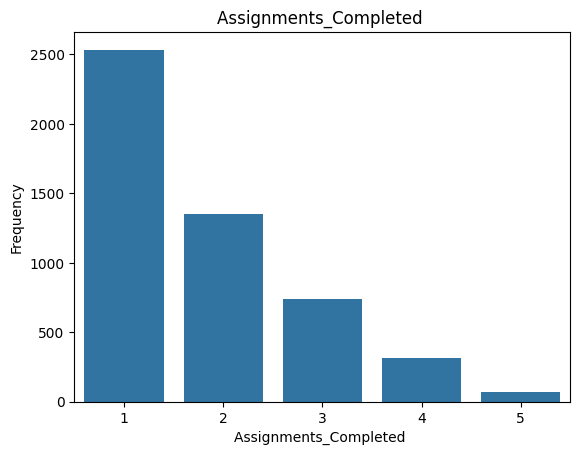

In [25]:
sns.countplot(x=df["Assignments_Completed"], data=df, gap= 2)
plt.title("Assignments_Completed ")
plt.xlabel("Assignments_Completed ")
plt.ylabel("Frequency")
plt.show()

##BIVARIATE


In [26]:
numerical_columns = df.select_dtypes(include="number")
corr = numerical_columns.corr()

In [27]:
# Return the average jamb score for both male and female

df.groupby('Gender').mean(numeric_only = True)['JAMB_Score'].round(2)

,JAMB_Score
Gender,
Female,174.76
Male,173.37


## checking for correlation between JAMB score and student study hour per week

In [28]:
np.r_[0,1] # Sele
df_new = df.iloc[:,np.r_[0,1]]
df_new.head()

,JAMB_Score,Study_Hours_Per_Week
0,192,22
1,207,14
2,182,29
3,210,29
4,199,12


Text(0, 0.5, 'Study hours per week')

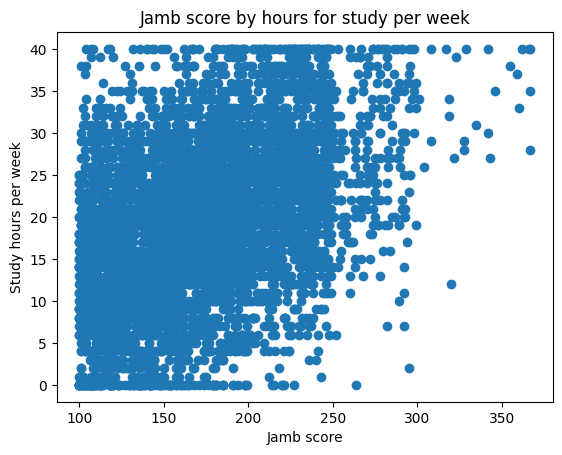

In [29]:
import matplotlib.pyplot as plt

x = df['JAMB_Score']
y = df['Study_Hours_Per_Week']

plt.scatter(x,y)

plt.title('Jamb score by hours for study per week')
plt.xlabel('Jamb score')
plt.ylabel('Study hours per week')

In [30]:
df_filtered = df_new[df_new['JAMB_Score']>200]


Text(0, 0.5, 'Study hours per week')

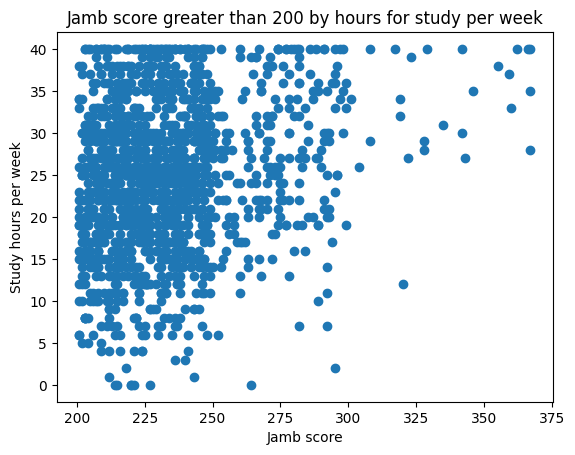

In [31]:
import matplotlib.pyplot as plt

x = df_filtered['JAMB_Score']
y = df_filtered['Study_Hours_Per_Week']

plt.scatter(x,y)

plt.title('Jamb score greater than 200 by hours for study per week')
plt.xlabel('Jamb score')
plt.ylabel('Study hours per week')

The wide scattering suggests other factors may also play a significant role in determining JAMB scores
the variation in study hours for similar scores could indicate differences in study efficiency and methods among students
Some high-scoring students are visible at the upper end of the JAMB scores, but their study hours vary significantly.

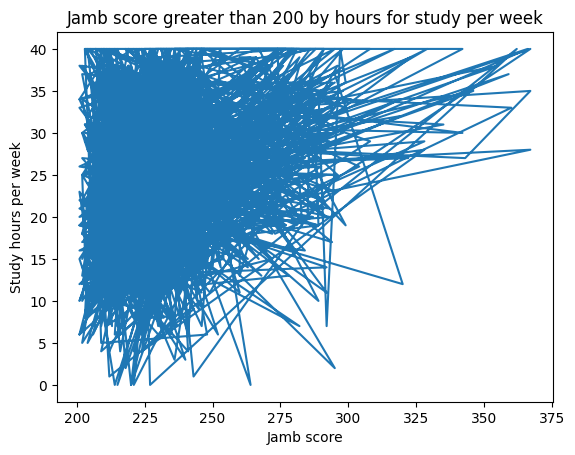

In [32]:
import matplotlib.pyplot as plt

x = df_filtered['JAMB_Score']
y = df_filtered['Study_Hours_Per_Week']

plt.plot(x,y)

plt.title('Jamb score greater than 200 by hours for study per week')
plt.xlabel('Jamb score')
plt.ylabel('Study hours per week')
plt.show()

There does not appear to be a clear linear correlation between study hours and Jamb scores, as high scores are achieved with both low and high study hours.

In [33]:
## Factors contributing to Outstanding performnce in JAMB result 2024

In [34]:
# Return theJamb score greater than or equal to 300

df_highscore = df[df["JAMB_Score"]>=300]
df_highscore

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
428,308,40,98,3,4.0,Public,Urban,No,Yes,High,Low,429,16,Female,Medium,Tertiary,1
706,301,34,86,4,1.4,Private,Urban,No,No,High,Medium,707,22,Female,High,Secondary,4
1037,342,30,100,4,10.8,Public,Urban,Yes,Yes,Medium,High,1038,20,Male,Medium,Tertiary,4
1167,320,12,100,4,5.8,Public,Urban,Yes,No,Low,Medium,1168,16,Male,Low,Secondary,1
1322,346,35,97,3,11.9,Public,Urban,Yes,Yes,Low,Low,1323,17,Male,Medium,Secondary,4
1391,360,33,76,4,6.5,Private,Rural,Yes,Yes,High,Medium,1392,17,Male,High,Tertiary,4
1541,366,40,91,2,9.7,Private,Urban,Yes,No,High,Medium,1542,20,Male,Medium,Secondary,3
1586,367,35,100,3,15.1,Private,Urban,Yes,Yes,Low,High,1587,18,Female,High,Secondary,4
1590,343,27,100,4,5.2,Public,Urban,Yes,Yes,High,High,1591,15,Male,High,Tertiary,2
1603,322,27,83,3,8.6,Public,Urban,No,Yes,Medium,Medium,1604,15,Male,High,Tertiary,1


In [63]:
df_highscore.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
428,308,40,98,3,4.0,Public,Urban,No,Yes,High,Low,429,16,Female,Medium,Tertiary,1
706,301,34,86,4,1.4,Private,Urban,No,No,High,Medium,707,22,Female,High,Secondary,4
1037,342,30,100,4,10.8,Public,Urban,Yes,Yes,Medium,High,1038,20,Male,Medium,Tertiary,4
1167,320,12,100,4,5.8,Public,Urban,Yes,No,Low,Medium,1168,16,Male,Low,Secondary,1
1322,346,35,97,3,11.9,Public,Urban,Yes,Yes,Low,Low,1323,17,Male,Medium,Secondary,4


In [36]:
# sort the top highscore from the highest to the lowest

df_top_highscore_sorted = df_highscore.sort_values(by="JAMB_Score", ascending=False)
x = df_top_highscore_sorted.head()

In [37]:
label = x['Student_ID']
JAMB_score = x['JAMB_Score']

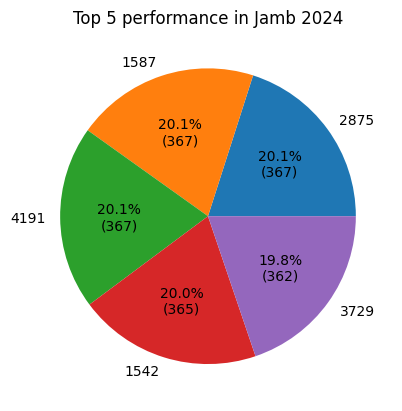

In [38]:
def func(pct, allvalues):
    absolute = int(pct/100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.pie(JAMB_score,labels=label,autopct=lambda pct: func(pct, JAMB_score))
plt.title("Top 5 performance in Jamb 2024")
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

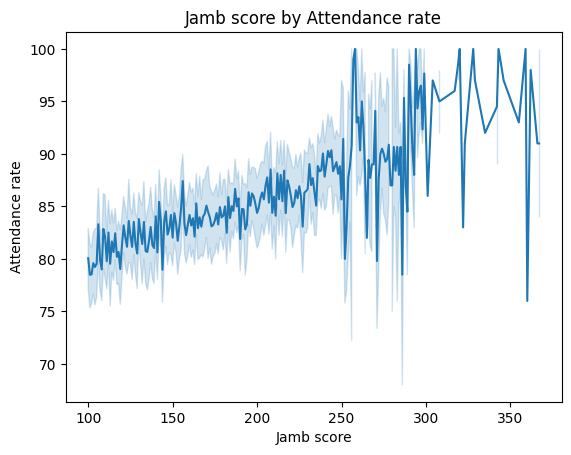

In [44]:
# Jambscore VS Attendance rate
sns.lineplot(x='JAMB_Score', y='Attendance_Rate', data=df)
plt.title('Jamb score by Attendance rate')
plt.xlabel('Jamb score')
plt.ylabel('Attendance rate')
plt.show()

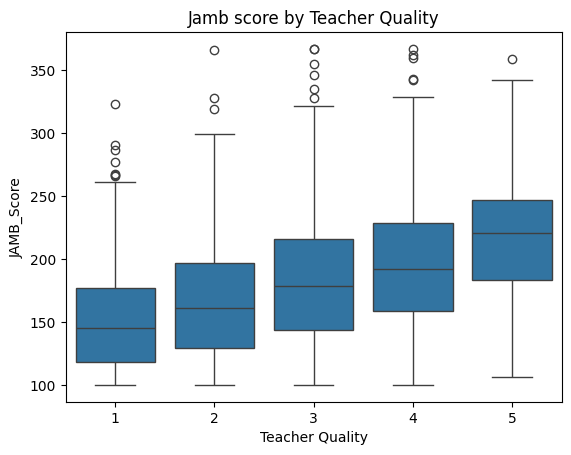

In [62]:
sns.boxplot(y='JAMB_Score', x='Teacher_Quality', data=df)
plt.title('Jamb score by Teacher Quality')
plt.xlabel('Teacher Quality')
plt.ylabel('JAMB_Score')
plt.show()

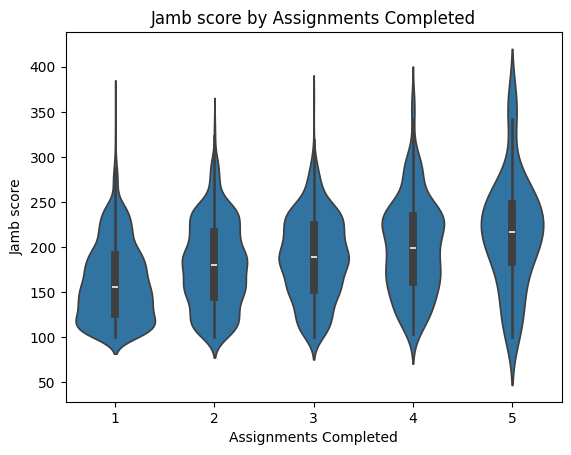

In [69]:
## Jambscore Vs Student Assignment
sns.violinplot(y='JAMB_Score', x='Assignments_Completed', data=df)
plt.title('Jamb score by Assignments Completed')
plt.xlabel('Assignments Completed')
plt.ylabel('Jamb score')
plt.show()


## MULTIVARIATE


In [80]:
#Jamb score vs Teacher qualimport plotly.graph_objects as go
import plotly.graph_objects as go
import plotly.express as px

px.scatter_3d(df, x='JAMB_Score', y='Teacher_Quality', z='Attendance_Rate', color='Teacher_Quality',color_discrete_map={1: 'green', 2: 'yellow', 3: ' red', 4: 'blue', 5: 'orange'})


#fig = px.bar(df, y='JAMB_Score', x='Teacher_Quality', color = "Gender")
#color_discrete_map={'Female': 'green', 'Male': 'yellow'}
#fig.show()

In [89]:
fig = px.bar(df, y='JAMB_Score', x='Teacher_Quality', color = "Gender",
color_discrete_sequence=["#008000", "#FFA500"])  # Specify bold color
fig.show()